<a href="https://colab.research.google.com/github/Khachapurilover/AI_PSU/blob/main/1/DrinksandGender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from sklearn.ensemble import RandomForestClassifier

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [38]:
dtf = pd.read_csv('/content/drive/MyDrive/Transformed Data Set - Sheet1.csv')
dtf.head()


,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


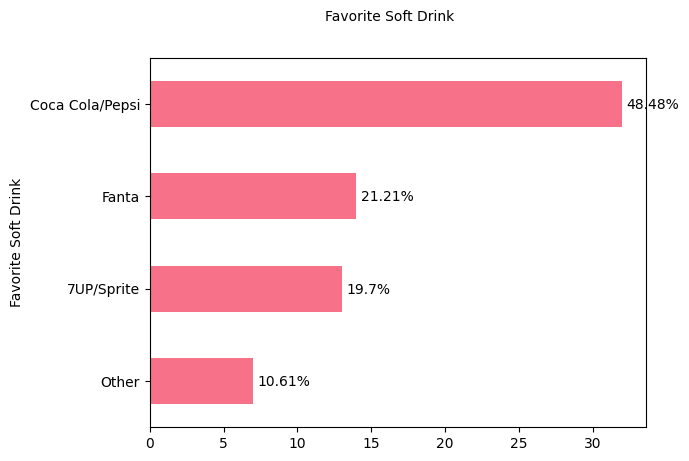

In [22]:
y ="Favorite Soft Drink"
ax = dtf[y].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.20,
            str(round((i.get_width()/total)*100, 2))+'%',
            fontsize=10, color='black')
plt.suptitle(y, fontsize=10)
plt.show()

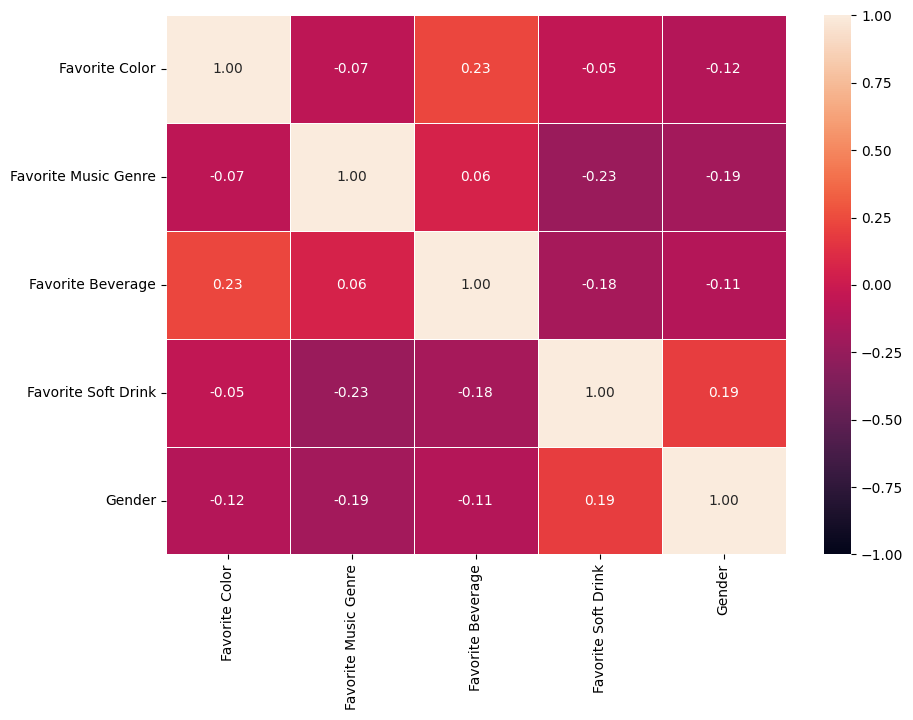

In [39]:
dtf_encoded = dtf.apply(LabelEncoder().fit_transform)
corr_matrix = (dtf_encoded.copy())
plt.figure(figsize=(10,7),dpi=100)
sns.heatmap(corr_matrix.corr(method = "pearson"), vmin=-1., vmax=1., annot=True, fmt='.2f', cbar=True, linewidths=0.5)
plt.show()

**LDA**

In [40]:
dtf_train, dtf_test = train_test_split(dtf_encoded, test_size=0.2, random_state=20)
train_x = dtf_train[['Favorite Music Genre', 'Favorite Soft Drink']]
train_y = dtf_train[['Gender']]
test_x = dtf_test[['Favorite Music Genre', 'Favorite Soft Drink']]
test_y = dtf_test[['Gender']]
lgr = LogisticRegression(solver='liblinear')
lgr.fit(train_x, train_y.values.ravel())
lgr_prediction = lgr.predict(test_x)
lgr_accuracy = accuracy_score(test_y, lgr_prediction)

print(f'sk LDA accuracy: {lgr_accuracy}')
print(f'sk LDA prediction: {lgr_prediction}')

sk LDA accuracy: 0.5
sk LDA prediction: [1 0 0 0 0 1 0 1 1 1 0 0 1 0]


In [41]:
accuracy = metrics.accuracy_score(test_y, lgr_prediction)
recall = metrics.recall_score(test_y, lgr_prediction, average="weighted")
precision = metrics.precision_score(test_y, lgr_prediction, average="weighted")
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(test_y, lgr_prediction, target_names=[str(i) for i in np.unique(test_y)]))

Recall (all 1s predicted right): 0.5
Precision (confidence when predicting a 1): 0.52
Detail:
              precision    recall  f1-score   support

           0       0.62      0.56      0.59         9
           1       0.33      0.40      0.36         5

    accuracy                           0.50        14
   macro avg       0.48      0.48      0.48        14
weighted avg       0.52      0.50      0.51        14



In [42]:
dtf_train_full, dtf_test_full = train_test_split(dtf_encoded, test_size=0.2, random_state=20)
train_x_full = dtf_train_full[['Favorite Color', 'Favorite Music Genre', 'Favorite Beverage', 'Favorite Soft Drink']]
train_y_full = dtf_train_full[['Gender']]
test_x_full = dtf_test_full[['Favorite Color', 'Favorite Music Genre', 'Favorite Beverage', 'Favorite Soft Drink']]
test_y_full = dtf_test_full[['Gender']]
lgr = LogisticRegression(solver='liblinear')
lgr.fit(train_x_full, train_y_full.values.ravel())
lgr_prediction_full = lgr.predict(test_x_full)
lgr_accuracy_full = accuracy_score(test_y_full, lgr_prediction_full)

print(f'sk LDA accuracy: {lgr_accuracy_full}')
print(f'sk LDA prediction: {lgr_prediction_full}')

sk LDA accuracy: 0.5714285714285714
sk LDA prediction: [1 0 0 0 0 1 0 1 1 1 0 0 1 1]


In [43]:
accuracy = metrics.accuracy_score(test_y_full, lgr_prediction_full)
recall = metrics.recall_score(test_y_full, lgr_prediction_full, average="weighted")
precision = metrics.precision_score(test_y_full, lgr_prediction_full, average="weighted")
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(test_y_full, lgr_prediction_full, target_names=[str(i) for i in np.unique(test_y_full)]))

Recall (all 1s predicted right): 0.57
Precision (confidence when predicting a 1): 0.61
Detail:
              precision    recall  f1-score   support

           0       0.71      0.56      0.62         9
           1       0.43      0.60      0.50         5

    accuracy                           0.57        14
   macro avg       0.57      0.58      0.56        14
weighted avg       0.61      0.57      0.58        14



**Decision tree**

In [48]:
dtf_train_dtc, dtf_test_dtc = train_test_split(dtf_encoded, test_size=0.2, random_state=20)
train_x_dtc = dtf_train_dtc[['Favorite Music Genre', 'Favorite Soft Drink']]
train_y_dtc = dtf_train_dtc[['Gender']]
test_x_dtc = dtf_test_dtc[['Favorite Music Genre', 'Favorite Soft Drink']]
test_y_dtc = dtf_test_dtc[['Gender']]
dtc = DecisionTreeClassifier(criterion='log_loss', splitter='random')
dtc.fit(train_x_dtc, train_y_dtc.values.ravel())
dtc_prediction = dtc.predict(test_x_dtc)
dtc_accuracy = accuracy_score(test_y_dtc, dtc_prediction)

print(f'Decision tree accuracy: {dtc_accuracy}')
print(f'Decision tree prediction: {dtc_prediction}')

Decision tree accuracy: 0.5714285714285714
Decision tree prediction: [0 0 0 0 0 1 0 0 0 1 0 1 1 1]


**Random forest**

In [49]:
dtf_train_rfc, dtf_test_rfc = train_test_split(dtf_encoded, test_size=0.2, random_state=20)
train_x_rfc = dtf_train_rfc[['Favorite Music Genre', 'Favorite Soft Drink']]
train_y_rfc = dtf_train_rfc[['Gender']]
test_x_rfc = dtf_test_rfc[['Favorite Music Genre', 'Favorite Soft Drink']]
test_y_rfc = dtf_test_rfc[['Gender']]
rfc = RandomForestClassifier(n_estimators=2, min_samples_leaf=5, random_state=20)
rfc.fit(train_x_rfc, train_y_rfc.values.ravel())
rfc_prediction = rfc.predict(test_x_rfc)
rfc_accuracy = accuracy_score(test_y_rfc, rfc_prediction)

print(f'Random forest accuracy: {rfc_accuracy}')
print(f'Random forest prediction: {rfc_prediction}')

Random forest accuracy: 0.6428571428571429
Random forest prediction: [0 0 0 0 0 1 0 0 0 1 0 0 1 1]
